In [ ]:
#Initialisation
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
#Importing datasets predefined train and test data
(X_train , y_train),(X_test , y_test) = keras.datasets.mnist.load_data()
X_train.shape

(60000, 28, 28)

In [ ]:
#Normalization
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [ ]:
#Resize the MNIST Image
image_Size = 28
X_train_flat = np.array(X_train).reshape(-1 , image_Size, image_Size,1)
X_test_flat = np.array(X_test).reshape(-1 , image_Size, image_Size,1)
print("X_train Dimensions" , X_train_flat.shape)
print("X_test Dimensions" ,X_test_flat.shape)

X_train Dimensions (60000, 28, 28, 1)
X_test Dimensions (10000, 28, 28, 1)


In [ ]:
#Building the CNN Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

model = Sequential()

#Input Layer
#Inputs the resized / reshaped image
model.add(Conv2D(64, (3,3), input_shape = X_train_flat.shape[1:]))
#Activation Function to make it non-linear
model.add(Activation("relu"))
#Pooling layer to make a maxiumum values of 2x2
model.add(MaxPooling2D(pool_size=(2,2)))

#2nd Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#3rd Layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

#1st Fully connected layer
model.add(Flatten()) #Flattens from 2D to 1D
model.add(Dense(64))
model.add(Activation("relu"))

#2nd Fully connected layer
model.add(Dense(32))
model.add(Activation("relu"))

#3rd Fully connected layer
model.add(Dense(10)) # Reduces output to total number of classes , 0-9 (10)
model.add(Activation("softmax"))

In [ ]:
#Summaries the output shape and how the pooling allows the nueral network to determine a single output
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                    

In [ ]:
#Compile CNN Model
model.compile(loss ="sparse_categorical_crossentropy", optimizer ="adam", metrics=['accuracy'])

In [ ]:
model.fit(X_train_flat,y_train,epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 74s 56ms/step - loss: 0.2657 - accuracy: 0.9190 - val_loss: 0.1234 - val_accuracy: 0.9630
Epoch 2/5
1313/1313 [==============================] - 71s 54ms/step - loss: 0.1112 - accuracy: 0.9658 - val_loss: 0.0943 - val_accuracy: 0.9702
Epoch 3/5
1313/1313 [==============================] - 73s 56ms/step - loss: 0.0791 - accuracy: 0.9750 - val_loss: 0.1036 - val_accuracy: 0.9686
Epoch 4/5
1313/1313 [==============================] - 71s 54ms/step - loss: 0.0625 - accuracy: 0.9806 - val_loss: 0.0659 - val_accuracy: 0.9788
Epoch 5/5
1313/1313 [==============================] - 75s 57ms/step - loss: 0.0501 - accuracy: 0.9842 - val_loss: 0.0566 - val_accuracy: 0.9824


In [ ]:
# Model Evaluation
test_loss, test_acc = model.evaluate(X_test_flat, y_test)
print("Loss on 10,000 test samples", test_loss)
print("Accuiarcy on 10,000 test samples", test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0517 - accuracy: 0.9844
Loss on 10,000 test samples 0.05167263001203537
Accuiarcy on 10,000 test samples 0.9843999743461609


313/313 [==============================] - 4s 14ms/step


array([3.0638145e-11, 2.9293767e-07, 3.4536875e-05, 9.9996310e-01,
       1.2507392e-12, 2.6862915e-07, 2.4136802e-11, 1.2572235e-08,
       1.6121963e-06, 2.5696739e-10], dtype=float32)

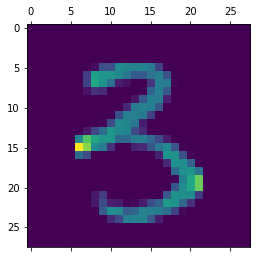

In [ ]:
#Image Prediction
prediction = model.predict(([X_test_flat]))
plt.matshow(X_test[5000]) #Displays the 28x28 image for the user
prediction[5000] #Prints array with the 0-9 classifications

In [ ]:
#Print integer prediction value
np.argmax(prediction[5000])

3